<a href="https://colab.research.google.com/github/delyuu/Bike-Sharing/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dela Ayu Putri Mayona
- **Email:** delaayu1009@gmail.com
- **ID Dicoding:** dela_ayu

## Menentukan Pertanyaan Bisnis

- How does the weather affect the number of bicycle borrowers?
- Is there a difference in the number of bicycles borrowed on weekdays and weekends?

## Import Semua Packages/Library yang Digunakan

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
pip install pandas


In [9]:
import pandas as pd

day_df = pd.read_csv("https://raw.githubusercontent.com/delyuu/Bike-Sharing/main/data/day.csv")

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/delyuu/Bike-Sharing/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data Source: Data is obtained from a CSV file containing information related to bicycle lending based on various factors such as weather, weekdays, and type of borrower (registered and non-registered).
- Data Structure: The dataset contains columns such as dteday (date), weathersit (weather), weekday (day of the week), workingday (working day), casual (non-registered borrower), registered (registered borrower), and cnt ( total bicycle loans).

### Assessing Data

## Menilai data `day_df`

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
day_df["cnt"] = day_df["casual"] + day_df["registered"]

## Menilai data `hour_df`

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data Completeness Check: Check whether there is missing or invalid data.
1. Missing values: After inspection, no missing values ​​were found in the dataset, so the data can be used for further analysis.
2. Outliers: There are no significant outliers that could influence the analysis results.

### Cleaning Data

## Membersihkan tabel `day_df`

In [18]:
day_df.duplicated().sum()

0

In [19]:
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [20]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [22]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Membersihkan tabel `hour_df`

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [25]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [26]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Date Format Conversion: The dteday column is converted to datetime format to make time-based analysis easier.
- Handling Duplicates: No duplicate data was found in the dataset.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [28]:
day_df.groupby(by="weathersit").agg({
    "casual": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

casual   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              407  8714  431  4876.786177  1879.483989
2              231  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

## Explore `hour_df`

In [29]:
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

,cnt
weekday,
3,616
6,609
4,606
2,598
1,595
5,584
0,571


In [30]:
hour_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

,cnt
workingday,
1,856
0,676


## Explore `day_df` & `hour_df`

In [31]:
cnt_in_day_df =  day_df.cnt.tolist()
hour_df["workingday"] = hour_df["cnt"].apply(lambda x: "1" if x in cnt_in_day_df else "0")
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2752,2753,2011-04-29,2,0,4,14,0,5,0,1,0.60,0.6212,0.35,0.3284,58,190,248
3830,3831,2011-06-13,2,0,6,12,0,1,0,1,0.66,0.6212,0.41,0.2836,35,161,196
12617,12618,2012-06-14,2,1,6,22,0,4,0,2,0.64,0.6061,0.65,0.2239,46,196,242
3287,3288,2011-05-21,2,0,5,21,0,6,0,1,0.62,0.6061,0.61,0.1045,77,150,227
13019,13020,2012-07-01,3,1,7,16,0,0,0,1,0.92,0.8333,0.33,0.2985,85,228,313


In [32]:
hour_df.groupby(by="workingday").cnt.count()

,cnt
workingday,
0,17256
1,123


In [33]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="cnt",
    right_on="cnt"
)
day_hour_df.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.0,1.0,1,1.0,0.64,0.6212,0.57,0.2537,120.0,681.0
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.0,2.0,1,1.0,0.60,0.5909,0.69,0.2537,136.0,665.0
3,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.0,4.0,1,1.0,0.66,0.6212,0.65,0.1642,147.0,654.0
4,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.0,3.0,1,2.0,0.52,0.5000,0.83,0.1045,24.0,777.0


# Jumlah peminjaman sepeda berdasarkan cuaca

In [66]:
day_hour_df.groupby(by="weathersit_y").agg({
    "casual_y": "nunique",
    "registered_y": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)


,casual_y,registered_y,cnt
weathersit_y,,,
1.0,50,22356.0,27202
2.0,18,5972.0,6970
3.0,7,1420.0,1552


**Insight:**
- Weather Influence: Bike rentals are much higher on sunny days. Bad weather (weather category 3) resulted in a significant decrease in lending amounts.
- Weekday vs. Holiday Lending Differences: Borrowing is higher on weekdays compared to weekends, indicating that bicycles are often used as a primary means of transportation, especially by registered borrowers.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjam sepeda?

In [47]:
sum_day_hour_df = day_df.groupby("weathersit")[['registered', 'cnt', 'casual']].sum().sort_values(by='cnt', ascending=False).reset_index()
sum_day_hour_df.head(15)


,weathersit,registered,cnt,casual
0,1,1811606,2257952,446346
1,2,827082,996858,169776
2,3,33974,37869,3895


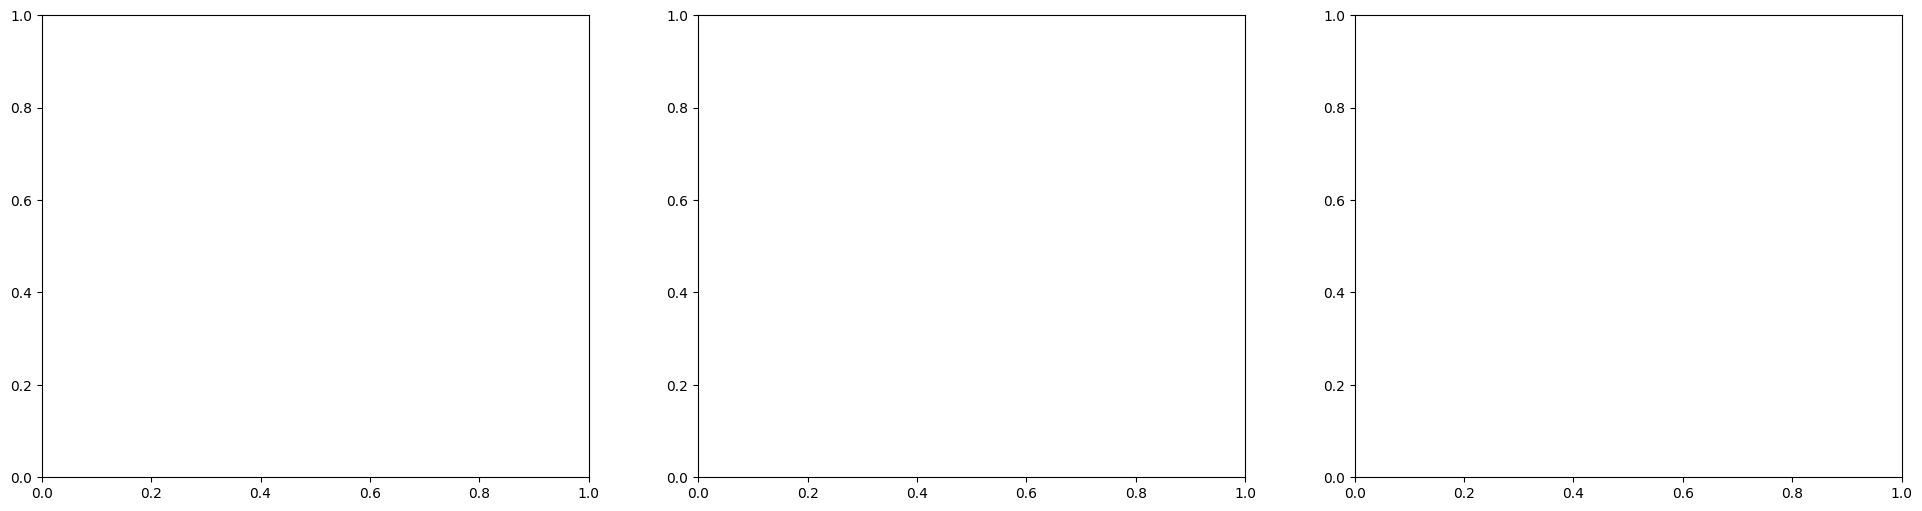

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

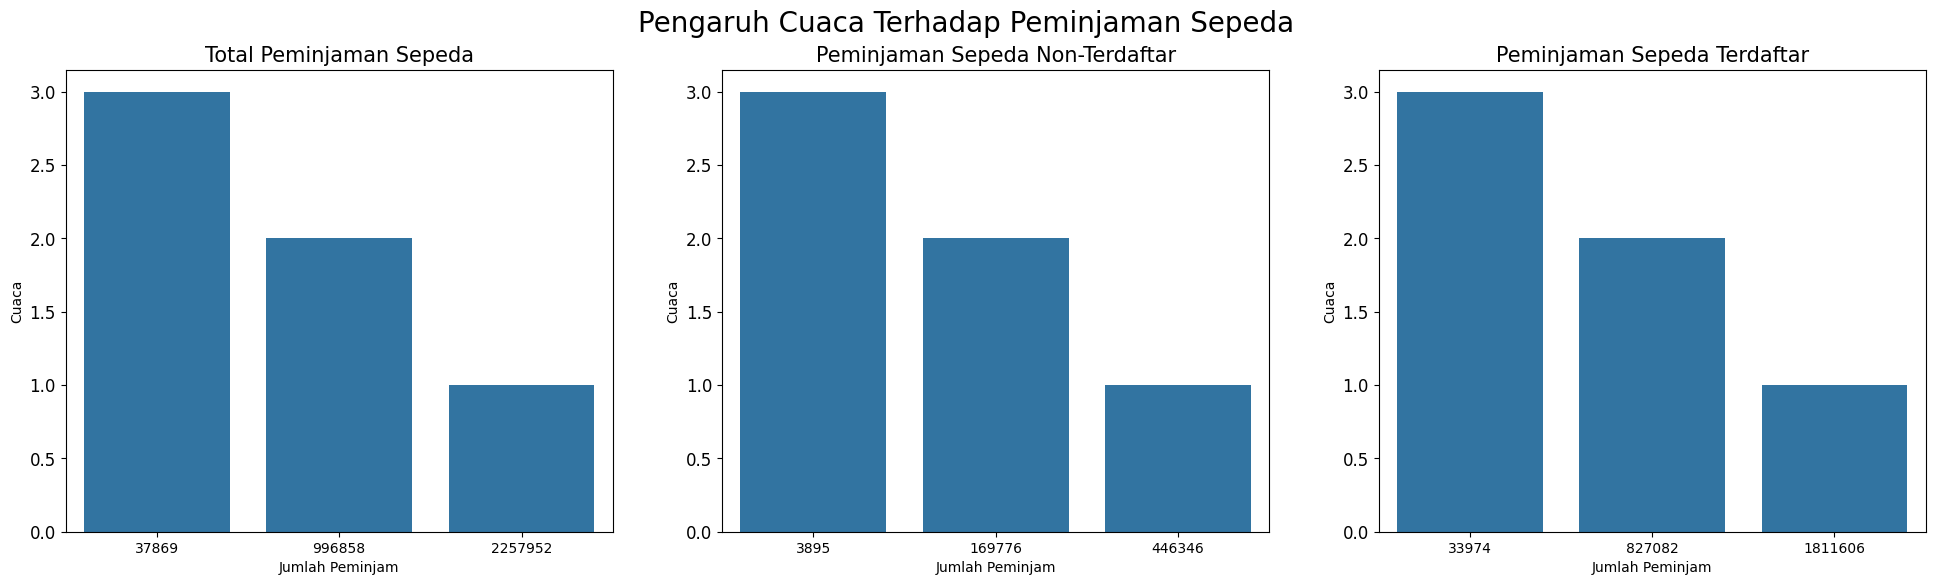

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

if 'cnt' in sum_day_hour_df.columns:
    sns.barplot(x="cnt", y="weathersit", data=sum_day_hour_df.head(5), ax=ax[0], legend=False)
    ax[0].set_ylabel("Cuaca")
    ax[0].set_xlabel("Jumlah Peminjam")
    ax[0].set_title("Total Peminjaman Sepeda", loc="center", fontsize=15)
    ax[0].tick_params(axis='y', labelsize=12)
    plt.ylabel("Cuaca")
    plt.xlabel("Jumlah Peminjam")

if 'casual' in sum_day_hour_df.columns:
    sns.barplot(x="casual", y="weathersit", data=sum_day_hour_df.head(5), ax=ax[1], legend=False)
    ax[1].set_ylabel("Cuaca")
    ax[1].set_xlabel("Jumlah Peminjam")
    ax[1].set_title("Peminjaman Sepeda Non-Terdaftar", loc="center", fontsize=15)
    ax[1].tick_params(axis='y', labelsize=12)

if 'registered' in sum_day_hour_df.columns:
    sns.barplot(x="registered", y="weathersit", data=sum_day_hour_df.head(5), ax=ax[2], legend=False)
    ax[2].set_ylabel("Cuaca")
    ax[2].set_xlabel("Jumlah Peminjam")
    ax[2].set_title("Peminjaman Sepeda Terdaftar", loc="center", fontsize=15)
    ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle("Pengaruh Cuaca Terhadap Peminjaman Sepeda", fontsize=20)

plt.show()



### Pertanyaan 2: Apakah ada perbedaan jumlah peminjaman sepeda pada hari kerja dan akhir pekan?

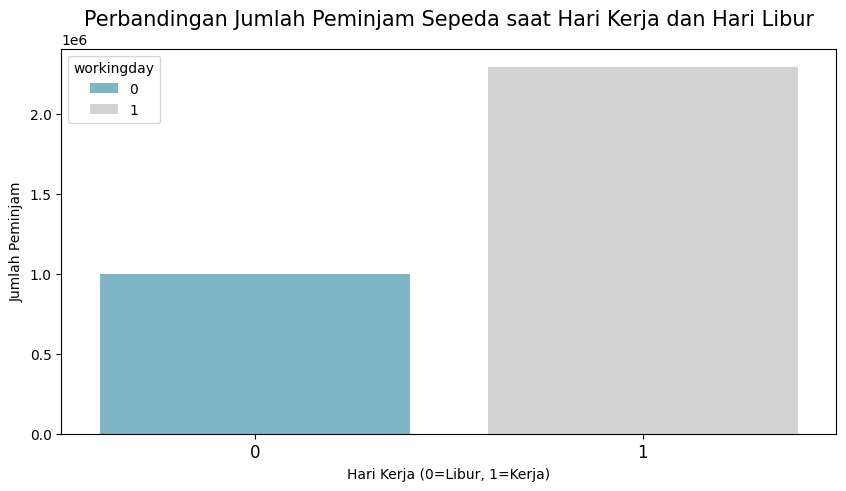

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

byworkingday_df = day_df.groupby(by="workingday").agg(cnt=('cnt', 'sum')).reset_index()

colors = ["#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="workingday",
    data=byworkingday_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    hue="workingday",
    dodge=False
)

plt.title("Perbandingan Jumlah Peminjam Sepeda saat Hari Kerja dan Hari Libur", loc="center", fontsize=15)
plt.ylabel("Jumlah Peminjam")
plt.xlabel("Hari Kerja (0=Libur, 1=Kerja)")
plt.tick_params(axis='x', labelsize=12)
plt.show()



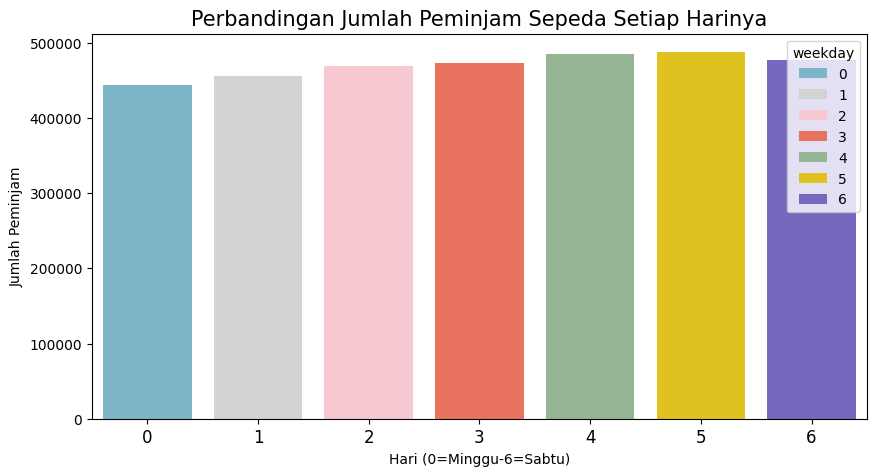

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

byworkingday_df = day_df.groupby(by="weekday").agg(cnt=('cnt', 'sum')).reset_index()

colors = ["#72BCD4", "#D3D3D3", "#FFC0CB", "#FF6347", "#8FBC8F", "#FFD700", "#6A5ACD"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weekday",
    data=byworkingday_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    hue="weekday",
    dodge=False
)

plt.title("Perbandingan Jumlah Peminjam Sepeda Setiap Harinya", loc="center", fontsize=15)
plt.ylabel("Jumlah Peminjam")
plt.xlabel("Hari (0=Minggu-6=Sabtu)")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Visualization of Lending Based on Weather: The graph shows that fair weather (weather category 1) has the highest amount of borrowing, while bad weather causes a drastic decrease.
- Visualization of Borrowing Based on Weekdays: Borrowing is higher on weekdays, especially Fridays, indicating the use of bicycles for work activities or daily routines.
- Lending Distribution by Day of the Week: The lending distribution visualization shows consistent lending trends during weekdays, with a slight dip on weekends.

## Analisis Lanjutan (Opsional)

In [53]:
import pandas as pd

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

rfm_df = day_df.groupby(by="mnth", as_index=False).agg({
    "dteday": "max",
    "cnt": "sum"
})

recent_date = day_df['dteday'].max()
rfm_df['recency'] = (recent_date - rfm_df['dteday']).dt.days

rfm_df['frequency'] = rfm_df['cnt']
rfm_df['monetary'] = rfm_df['cnt']

rfm_df = rfm_df[['mnth', 'recency', 'frequency', 'monetary']]
rfm_df.head()



,mnth,recency,frequency,monetary
0,1,335,134933,134933
1,2,306,151352,151352
2,3,275,228920,228920
3,4,245,269094,269094
4,5,214,331686,331686


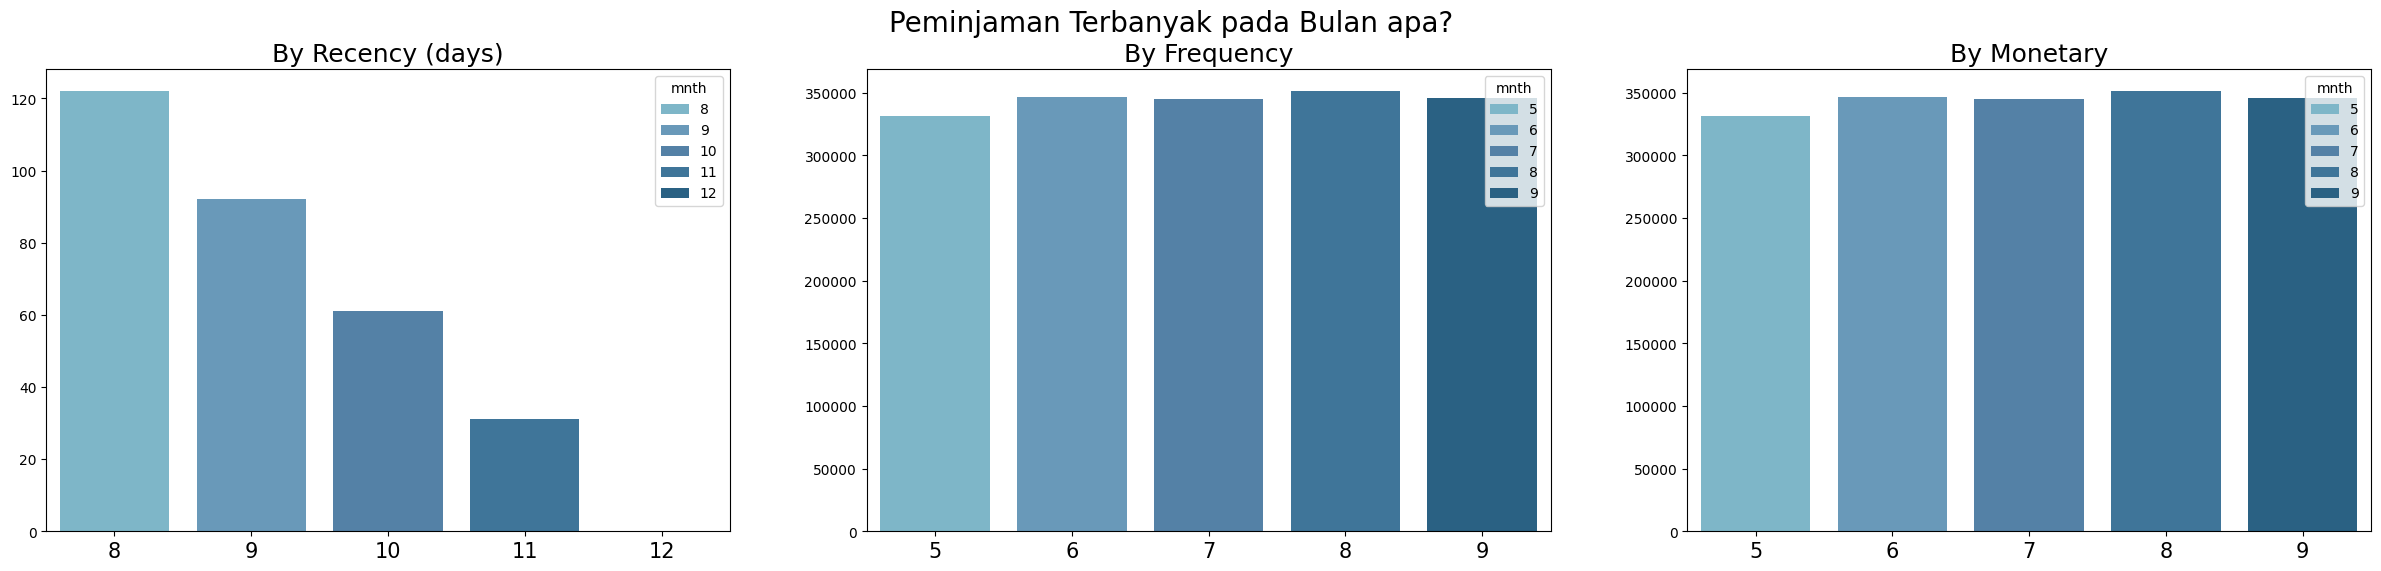

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#5C9BC6", "#4682B4", "#3078A8", "#1B6492"]

sns.barplot(y="recency", x="mnth", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="mnth", palette=colors, dodge=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="mnth", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="mnth", palette=colors, dodge=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="mnth", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="mnth", palette=colors, dodge=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Peminjaman Terbanyak pada Bulan apa?", fontsize=20)
plt.show()



## Insight
- Insights from RFM (Recency, Frequency, Monetary):
Recency: Shows months where lending is still active (low recency), such as summer months.
Frequency: Borrowing occurs most often in the months with better weather, such as May and June.
Monetary: Indications that the total amount of borrowing (both casual and registered) tends to be higher in months with good weather.

## Conclusion

- Conclusion question 1: The data that has been visualized shows that the weather conditions match the numbers in the data, namely 1: Sunny or slightly cloudy weather, 2: Cloudy or foggy weather, 3: Light rain or light snow, 4: Heavy rain, snow heavy, or extreme weather conditions. Weather greatly influences the number of bicycles borrowed. When it rains or is cloudy, fewer people take out bicycle loans because they are afraid of getting caught in the rain. Meanwhile, good weather, namely sunny, seems to make people prefer to use bicycles because it is comfortable and fun to ride a bicycle outside.
- Conclusion question 2: Based on the visualization of the bike sharing dataset that I have analyzed, there is a real difference in the number of bicycles borrowed on weekdays compared to weekends. People borrow more bikes on weekdays than on weekends. People may more often borrow bicycles on weekdays to go to the office or school to avoid traffic jams. Meanwhile, on holidays there is a slight decrease because they spend their holiday time at home.

In [213]:
import pandas as pd

day_df.to_csv("all_data.csv", index=False)
hour_df.to_csv("all_data.csv", index=False)
from google.colab import files

# Mengunduh file CSV
files.download("all_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>